In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('spam.csv', encoding = 'cp1252')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Step 3: Data Cleaning

In [3]:
data.shape

(5572, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.isnull().sum() / len(data)*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

- Unnamed: 2 , Unnamed: 3 and Unnamed: 4 have 99% missing value so drop these column

In [6]:
data = data.drop(['Unnamed: 2' , 'Unnamed: 3','Unnamed: 4'], axis =1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data['v1'].value_counts()/len(data)*100

ham     86.593683
spam    13.406317
Name: v1, dtype: float64

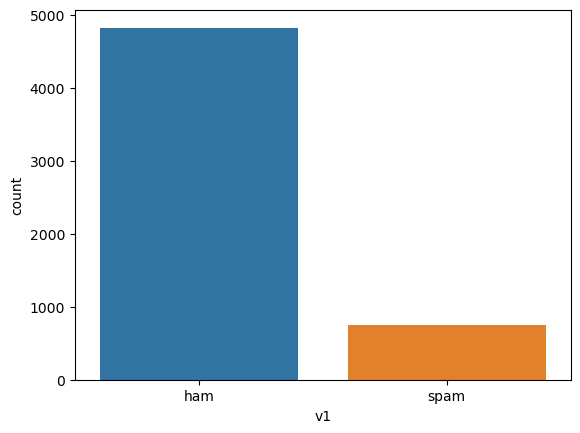

In [8]:
sns.countplot(x= data['v1'])
plt.show()

### Observations:
- Here target variable is v1 it has only two values ham and spam
- Replace all the ham with 0 and spam with 1

In [9]:
dic1 = {'ham':0,'spam':1}
dic1

{'ham': 0, 'spam': 1}

In [10]:
data['v1']= data['v1'].replace(dic1)
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Text Cleaning:
- Text cleaning involves removing any unnecessary characters, symbols, or noise from the text data. 
- This might include punctuation, special characters, and numbers.

In [11]:
data['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

#### Step 1 : convert all upper cases into lower cases

In [12]:
data['v2']= data['v2'].str.lower()

In [13]:
data['v2']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: v2, Length: 5572, dtype: object

#### Step 2: Remove all punctuations

In [14]:
import string
eng_punct= string.punctuation
eng_punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punc(v2):
    translator = str.maketrans('', '', eng_punct)  ##I am taking help of str.maketrans method to remove the punctuaitons
    return v2.translate(translator)

In [16]:
data['v2'] = data['v2'].apply(lambda x : remove_punc(x))
data.head()

,v1,v2
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


#### Step 3: Removing all the stop words from the data

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91708\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
def remove_stopwords(v2):
    return " ".join([word for word in v2.split() if word not in stop_words])

data['v2'] = data['v2'].apply(lambda x:remove_stopwords(x))
data.head()

,v1,v2
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


#### Step 4: Remove the digits from the text column

In [20]:
import re 
def remove_nums(v2):
    return re.sub('[0-9]+', "", v2)   ## used to find the number from the text

data['v2'] = data['v2'].apply(lambda x : remove_nums(x))

In [21]:
data.tail(10)

,v1,v2
5562,0,ok lor sony ericsson salesman ask shuhui say q...
5563,0,ard like dat lor
5564,0,dont wait til least wednesday see get
5565,0,huh lei
5566,1,reminder o get pounds free call credit detail...
5567,1,nd time tried contact u u å£ pound prize cla...
5568,0,ì b going esplanade fr home
5569,0,pity mood soany suggestions
5570,0,guy bitching acted like id interested buying s...
5571,0,rofl true name


In [22]:
data.head(10)

,v1,v2
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though
5,1,freemsg hey darling weeks word back id like f...
6,0,even brother like speak treat like aids patent
7,0,per request melle melle oru minnaminunginte nu...
8,1,winner valued network customer selected receiv...
9,1,mobile months u r entitled update latest colo...


In [ ]:
### Separate X and Y

In [44]:
x= data.drop('v2',axis=1)
y= data['v2']

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
vec

CountVectorizer()

In [46]:
x_encode = vec.fit_transform(x)
x_encode

<1x1 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

### Split data into train and test set

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [38]:
lr.fit(x_train,y_train)

LogisticRegression()

### Prediction

In [42]:
y_pred = lr.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.003587443946188341